In [1]:
!pip install gdown

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)


In [2]:
import gdown
import zipfile
import os

In [3]:
url = 'https://drive.google.com/drive/folders/1fU99i8-gKaVPFjZjV8qXna6bKkWcC5b0?usp=sharing'

download_folder = "./dataset"
gdown.download_folder(url, output=download_folder)

Retrieving folder contents


Processing file 13GaY9DbMFIubDYLGPJaa9taOS_a9fZG3 asap-aes.zip


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=13GaY9DbMFIubDYLGPJaa9taOS_a9fZG3
From (redirected): https://drive.google.com/uc?id=13GaY9DbMFIubDYLGPJaa9taOS_a9fZG3&confirm=t&uuid=30476a08-ed44-4537-ac51-3444e9207a14
To: /home/salsabila.pranida/ai_project_aes/dataset/asap-aes.zip
100%|██████████| 82.6M/82.6M [00:05<00:00, 16.0MB/s]
Download completed


['./dataset/asap-aes.zip']

In [4]:
for file_name in os.listdir(download_folder):
    if file_name.endswith(".zip"):
        zip_path = os.path.join(download_folder, file_name)
        
        # Unzip the file into the target folder
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(download_folder)
        print(f"Unzipped {file_name} in {download_folder}")
        os.remove(zip_path)

Unzipped asap-aes.zip in ./dataset


In [7]:
import os
import pandas as pd

df = pd.read_csv("dataset/training_set_rel3.tsv", sep='\t', encoding='ISO-8859-1')

df = df.dropna(axis=1)
df = df.drop(columns=['rater1_domain1', 'rater2_domain1'])
df = df.drop(columns=['essay_id', 'essay_set'])
df.head()

,essay,domain1_score
0,"Dear local newspaper, I think effects computer...",8
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,"Dear @LOCATION1, I know having computers has a...",8


In [8]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   essay          12976 non-null  object
 1   domain1_score  12976 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 202.9+ KB


In [9]:
# Display basic statistics for numeric columns
df.describe()

,domain1_score
count,12976.000000
mean,6.800247
std,8.970705
min,0.000000
25%,2.000000
50%,3.000000
75%,8.000000
max,60.000000


In [10]:
# Check for missing values in each column
df.isnull().sum()

essay            0
domain1_score    0
dtype: int64

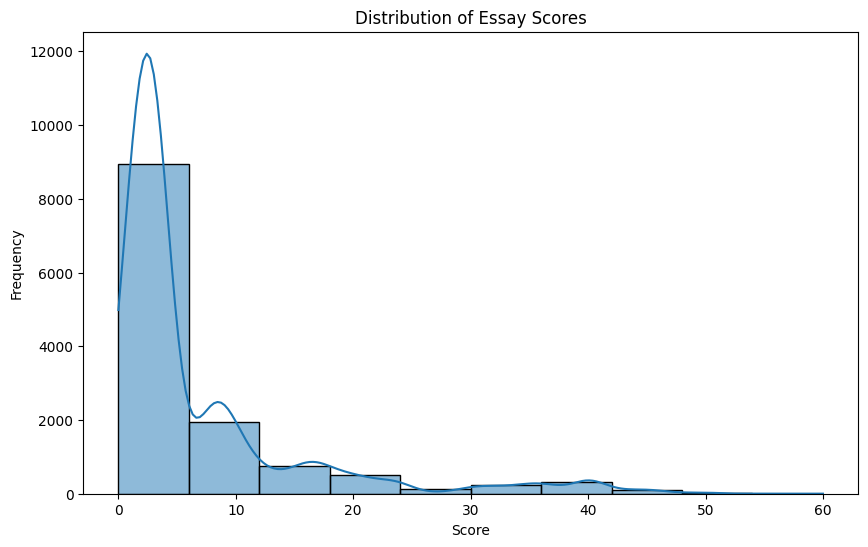

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(df['domain1_score'], kde=True, bins=10)
plt.title('Distribution of Essay Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

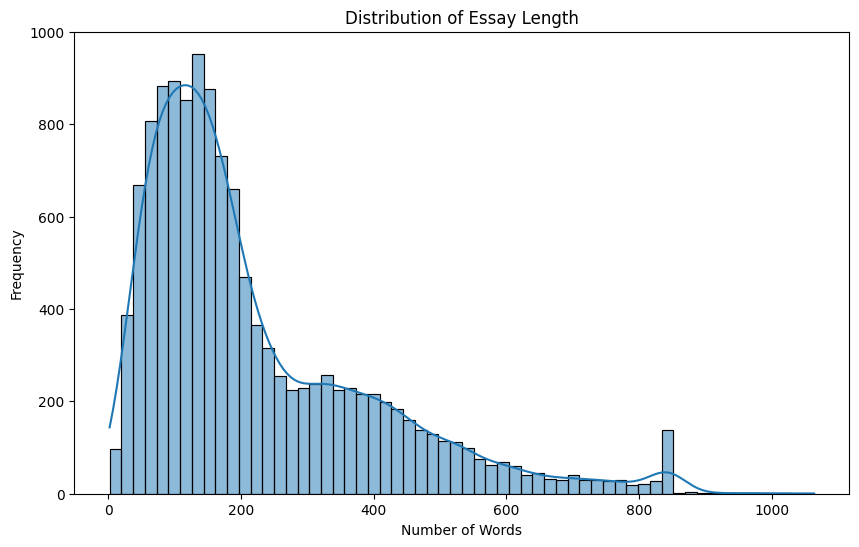

In [16]:
# Calculate the number of words in each essay
df['essay_length'] = df['essay'].apply(lambda x: len(x.split()))

# Plot the distribution of essay lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['essay_length'], kde=True)
plt.title('Distribution of Essay Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

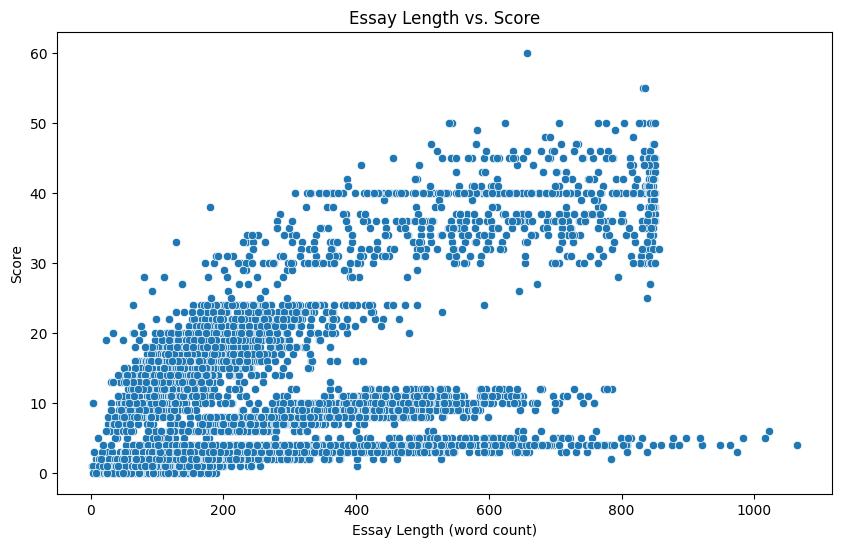

Correlation between essay length and score:
               essay_length  domain1_score
essay_length       1.000000       0.586419
domain1_score      0.586419       1.000000


In [17]:
# Scatter plot to visualize correlation between essay length and score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='essay_length', y='domain1_score')
plt.title('Essay Length vs. Score')
plt.xlabel('Essay Length (word count)')
plt.ylabel('Score')
plt.show()

# Calculate correlation
correlation = df[['essay_length', 'domain1_score']].corr()
print("Correlation between essay length and score:")
print(correlation)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/salsabila.pranida/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


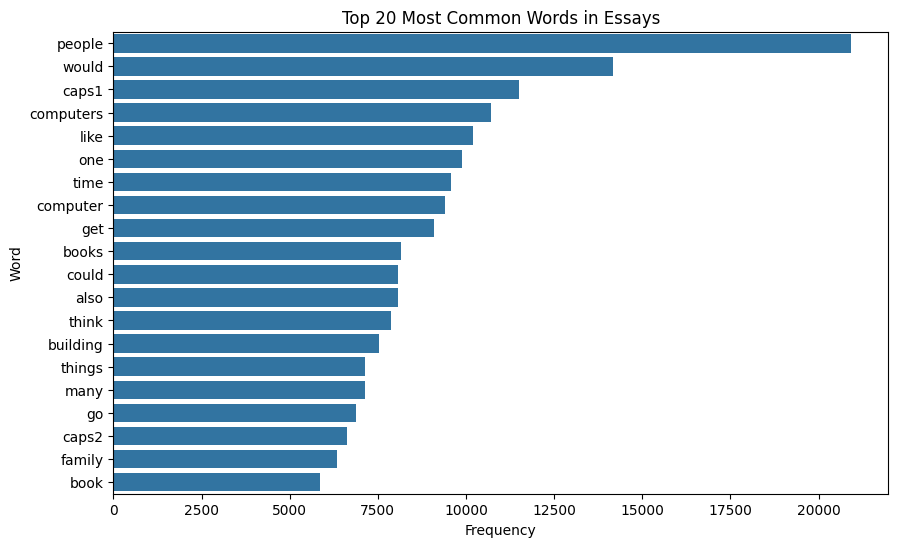

In [20]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords if needed
nltk.download('stopwords')

# Preprocess and find the most common words
stop_words = set(stopwords.words('english'))
all_words = ' '.join(df['essay']).lower()
all_words = re.sub(r'\W', ' ', all_words)
words = [word for word in all_words.split() if word not in stop_words]

# Get word frequency
word_counts = Counter(words)
common_words = word_counts.most_common(20)

# Plot most common words
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(data=common_words_df, x='Frequency', y='Word')
plt.title('Top 20 Most Common Words in Essays')
plt.show()

Counts of each unique score in 'domain1_score':
domain1_score
0      418
1     1736
2     2445
3     2830
4     1424
5       96
6      137
7      163
8      737
9      383
10     372
11     165
12     133
13      82
14     105
15      86
16     199
17     160
18     118
19      88
20     103
21      70
22      63
23      53
24      99
25       5
26       4
27       6
28      11
29       8
30      49
31      34
32      37
33      32
34      39
35      47
36      65
37      39
38      20
39       8
40     161
41      22
42      23
43      15
44      14
45      31
46      13
47       7
48       3
49       2
50      13
55       2
60       1
Name: count, dtype: int64


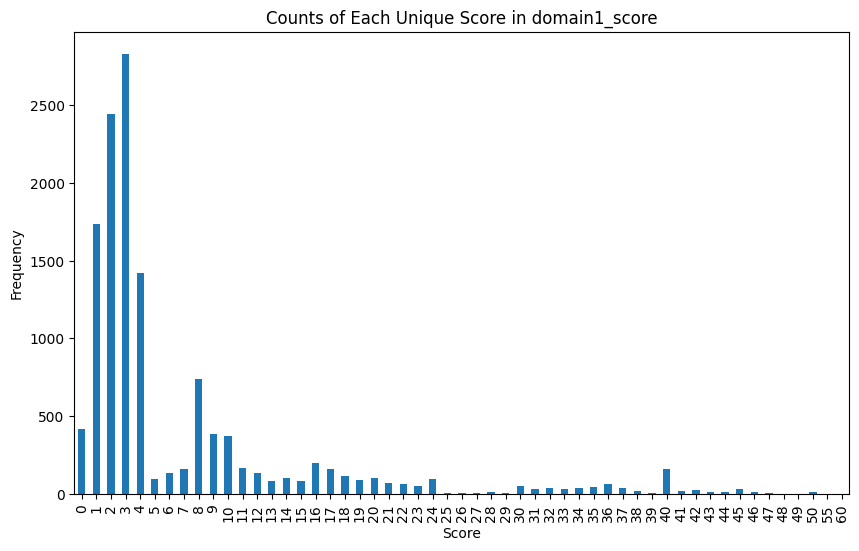

In [21]:
# Count unique values in 'domain1_score'
score_counts = df['domain1_score'].value_counts().sort_index()

# Display the counts
print("Counts of each unique score in 'domain1_score':")
print(score_counts)

# Plot the counts for each score
plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.title('Counts of Each Unique Score in domain1_score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()